## SMOTE(synthetic Minority Oversampling Technique)

SMOTE is a technique is a technique used in machine learning to address imbalanced datasets where the minority class has significant fewer instances than the majority class. SMOTE involes generating synthetic instances if the minority class by interpolating between existing instance

In [3]:
#We will make our own dataset in this 
from sklearn.datasets import make_classification

In [5]:
#X is the independent feature or the input and y is the depenedent feature or the output
X, y = make_classification(n_samples = 1000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.90], random_state = 1)

In [7]:
#lets convert this X, y in dataframe first
import pandas as pd
df1 = pd.DataFrame(X, columns = ['f1','f2'])
df2 = pd.DataFrame(y, columns=['Target'])
final_df = pd.concat([df1,df2], axis = 1)

In [9]:
final_df.head()

,f1,f2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [11]:
final_df['Target'].value_counts()
#So if we see the target columns the data set is clearly Unbalanced Dataset and this is what we intended to make 


Target
0    894
1    106
Name: count, dtype: int64

#Lets plot and see these data points

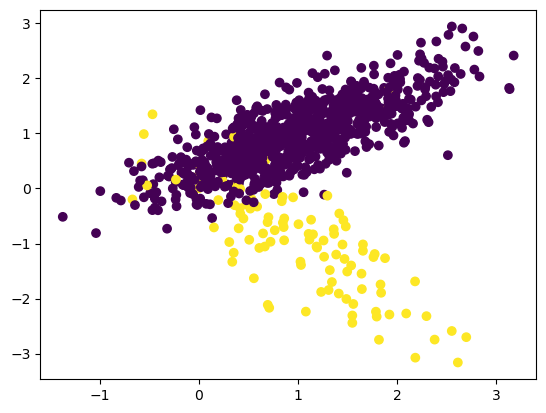

In [14]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['Target'])

#### Now let us Balance this Unbalanced Dataset

In [16]:
#For doing this we need a library imblearn
!pip install imblearn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from imblearn.over_sampling import SMOTE


In [23]:
## Transform the Dataset
#It will connect with 5 nearest neighbors and add the data points
oversample= SMOTE()
X, y = oversample.fit_resample(final_df[['f1','f2']],final_df['Target'])

In [25]:
X.shape


(1788, 2)

--Initially
Target
0    894
1    106

--After Transform
0    894
1    894

so the shape becomes 894

In [27]:
y.shape

(1788,)

In [32]:
len(y[y == 0])

894

In [34]:
df1 = pd.DataFrame(X, columns = ['f1','f2'])
df2 = pd.DataFrame(y, columns=['Target'])
oversample_df = pd.concat([df1,df2], axis = 1)

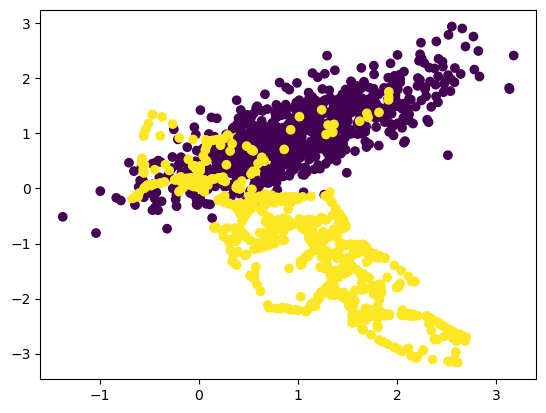

In [36]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c = oversample_df['Target'])

In [ ]:
#Here we can see that the data set got balanced